# **Car Market Analysis**


## **1. Project Overview**

* **Goal:**  
Analyze a car market dataset to explore price distributions and differences across key categorical vehicle attributes, and to identify data quality issues relevant for further analysis.

* **Key questions:**
1.   How are car prices distributed overall, and are there notable outliers?
2.   How do prices differ across major categorical features such as fuel type, transmission, and vehicle style?
3.   Which data quality issues (missing values, inconsistent categories, unrealistic values) must be addressed before analysis?

* **Dataset context:**  
The dataset contains car listings with a mix of numerical and categorical vehicle attributes.  
Each row represents a single vehicle listing.  
The dataset does not explicitly distinguish between new and used vehicles and does not include variables such as mileage or vehicle condition.








## **2. Setup and Imports**
Initialize the analysis environment and configure display and visualization settings.

In [1]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display & style settings
pd.options.display.max_columns = None
pd.options.display.width = 120
sns.set_theme(style="whitegrid")


## **3. Data Loading**
Load the dataset from the GitHub repository to ensure reproducibility.

### **Data Processing Stages**

The dataset is handled in
distinct processing stages throughout the analysis:

- **df_car_raw**: original dataset as loaded
- **df_car_clean**: cleaned dataset (quality fixes, missing values, standardization)
- **df_car_analysis**: analysis-ready dataset (filters and engineered features)


In [2]:
# Load car dataset from GitHub repository | Processing Stage: "RAW"
url = "https://raw.githubusercontent.com/t-jor/car-market-analysis/main/data/data.csv"
df_car_raw = pd.read_csv(url)

## **4. Data Inspection**
The following steps are used to understand the structure, size, and quality of the dataset before applying any cleaning or transformations.

### **Initial Observations**

Based on the initial data inspection, several noteworthy patterns and potential issues emerge:

- The *Market Category* column contains a substantial number of missing values, which may affect segment-based analyses.
- The *Engine Cylinders* column includes zero values, suggesting either electric vehicles or potential data inconsistencies that require further investigation.
- The dataset spans vehicles from 1990 to 2017, indicating a wide temporal range.
- Key numerical variables such as *MSRP*, *Engine HP*, and *Popularity* appear to be strongly right-skewed, with high variance and extreme outliers.
- Some other numerical features may show more symmetric distributions, which will be further examined in later exploratory analysis sections.

These observations inform the data cleaning and exploratory analysis steps that follow.


In [4]:
# Check the number of rows and columns to get a quick overview of the dataset size.
df_car_raw.shape

(11914, 16)

In [5]:
# Inspect the first rows to understand the overall structure, column names, and typical values.
df_car_raw.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
# Inspect the last rows to ensure consistency and detect potential issues at the end of the data.
df_car_raw.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [7]:
# Review column data types and non-null counts to identify potential type issues and missing values.
df_car_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [8]:
# Examine summary statistics to understand value ranges, distributions, and categorical characteristics.
df_car_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,11914.0,2010.384338,7.579740,1990.0,2007.0,2015.0,2016.00,2017.0
Engine HP,11845.0,249.386070,109.191870,55.0,170.0,227.0,300.00,1001.0
Engine Cylinders,11884.0,5.628829,1.780559,0.0,4.0,6.0,6.00,16.0
Number of Doors,11908.0,3.436093,0.881315,2.0,2.0,4.0,4.00,4.0
highway MPG,11914.0,26.637485,8.863001,12.0,22.0,26.0,30.00,354.0
city mpg,11914.0,19.733255,8.987798,7.0,16.0,18.0,22.00,137.0
Popularity,11914.0,1554.911197,1441.855347,2.0,549.0,1385.0,2009.00,5657.0
MSRP,11914.0,40594.737032,60109.103604,2000.0,21000.0,29995.0,42231.25,2065902.0


In [9]:
# The extended summary statistics include categorical information such as the number of unique values per column, the most frequent value, and its frequency, providing additional context for non-numeric features.
df_car_raw.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Make,11914,48,Chevrolet,1123,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,11914,915,Silverado 1500,156,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,11914.0,NaN,NaN,NaN,2010.384338,7.57974,1990.0,2007.0,2015.0,2016.0,2017.0
Engine Fuel Type,11911,10,regular unleaded,7172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine HP,11845.0,NaN,NaN,NaN,249.38607,109.19187,55.0,170.0,227.0,300.0,1001.0
Engine Cylinders,11884.0,NaN,NaN,NaN,5.628829,1.780559,0.0,4.0,6.0,6.0,16.0
Transmission Type,11914,5,AUTOMATIC,8266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Driven_Wheels,11914,4,front wheel drive,4787,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number of Doors,11908.0,NaN,NaN,NaN,3.436093,0.881315,2.0,2.0,4.0,4.0,4.0
Market Category,8172,71,Crossover,1110,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Identify how many values are missing per column to inform data cleaning decisions.
df_car_raw.isna().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,69
Engine Cylinders,30
Transmission Type,0
Driven_Wheels,0
Number of Doors,6
Market Category,3742


In [11]:
# Check the number of unique values per column to distinguish categorical variables from identifiers.
df_car_raw.nunique()

,0
Make,48
Model,915
Year,28
Engine Fuel Type,10
Engine HP,356
Engine Cylinders,9
Transmission Type,5
Driven_Wheels,4
Number of Doors,3
Market Category,71


In [12]:
# Quick overview of categories (top values)
for col in ["Engine Fuel Type", "Transmission Type", "Driven_Wheels", "Vehicle Size", "Vehicle Style"]:
    print(f"\n{col}")
    display(df_car_raw[col].value_counts(dropna=False))



Engine Fuel Type


,count
Engine Fuel Type,
regular unleaded,7172
premium unleaded (required),2009
premium unleaded (recommended),1523
flex-fuel (unleaded/E85),899
diesel,154
electric,66
flex-fuel (premium unleaded required/E85),54
flex-fuel (premium unleaded recommended/E85),26
flex-fuel (unleaded/natural gas),6



Transmission Type


,count
Transmission Type,
AUTOMATIC,8266
MANUAL,2935
AUTOMATED_MANUAL,626
DIRECT_DRIVE,68
UNKNOWN,19



Driven_Wheels


,count
Driven_Wheels,
front wheel drive,4787
rear wheel drive,3371
all wheel drive,2353
four wheel drive,1403



Vehicle Size


,count
Vehicle Size,
Compact,4764
Midsize,4373
Large,2777



Vehicle Style


,count
Vehicle Style,
Sedan,3048
4dr SUV,2488
Coupe,1211
Convertible,793
4dr Hatchback,702
Crew Cab Pickup,681
Extended Cab Pickup,623
Wagon,592
2dr Hatchback,506


## **5. Data Cleaning**
Resolve missing values, apply domain-driven assumptions (e.g., electric vs. combustion engines), remove non-informative features, and standardize variables to prepare the dataset for robust analysis.

In [13]:
# Make a copy to keep original data & create DataFrame for cleaning | Processing Stage: "CLEAN"
df_car_clean = df_car_raw.copy()

In [14]:
df_car_clean.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### **5.1 Missing Data - Summary of Findings and Decisions**

**5.1.0 Overview**
During the data inspection phase, missing values were identified in five columns:
Market Category, Engine HP, Engine Cylinders, Number of Doors, and Engine Fuel Type.
These missing values differ substantially in both frequency and analytical relevance and therefore require different handling strategies.

**5.1.1 Number of Doors and Engine Fuel Type**
Columns with only a negligible number of missing values (Number of Doors and Engine Fuel Type) were removed directly, as their very small number of missing values makes their removal negligible for the overall analysis.

**5.1.2 Engine Cylinders**
Engine Cylinders required deeper inspection. Since electric cars do not have combustion engines, a value of 0 cylinders is semantically correct and is therefore retained. Missing cylinder values for rotary engines were identified as a
structural characteristic of Wankel engines rather than data errors. To explicitly capture these
fundamental mechanical differences, an additional Engine Type classification was introduced
(combustion, electric, rotary).

**5.1.3 Engine HP**
Missing Engine HP values were then analyzed by engine type. The majority of missing values
occurred for electric vehicles, where power ratings are often reported inconsistently and are
not directly comparable to combustion engines. In contrast, missing horsepower values for
combustion engines were rare and treated as data quality issues.

Although electric and rotary vehicles were handled consistently from a data quality
perspective, their very small sample sizes relative to combustion vehicles, combined with
limited comparability of key performance metrics, would significantly constrain meaningful
analysis. Therefore, to ensure analytical focus, data completeness, and comparability, the
final dataset was restricted to combustion-engine vehicles.

**5.1.4 Market Category**
Finally, the Market Category column was removed due to a high proportion of missing values,
a very high cardinality, and ambiguous multi-label semantics. Vehicle Style provides a more
consistent and interpretable categorical representation for downstream analysis.


#### **5.1.0 Overview**

To support informed data cleaning decisions, the proportion of missing values is calculated for each column.  
This allows distinguishing between negligible missingness and structurally relevant gaps in the data.


In [15]:
total_rows = len(df_car_raw)
missing_counts = df_car_raw.isna().sum()
missing_share = ((missing_counts / total_rows) * 100).round(2)

missing_summary = (
    pd.DataFrame({
        "Missing": missing_counts,
        "Share (%)": missing_share
    })
    .query("Missing > 0")
    .sort_values("Missing", ascending=False)
)

missing_summary


,Missing,Share (%)
Market Category,3742,31.41
Engine HP,69,0.58
Engine Cylinders,30,0.25
Number of Doors,6,0.05
Engine Fuel Type,3,0.03


#### **5.1.1 Number of Doors and Engine Fuel Type - Drop Missing Data**

In [16]:
# Missing Data before Cleaning
df_car_clean[["Number of Doors", "Engine Fuel Type"]].isna().sum()

,0
Number of Doors,6
Engine Fuel Type,3


In [17]:
# Drop Missing Data
df_car_clean = df_car_clean.dropna(
    subset=["Number of Doors", "Engine Fuel Type"]
)

In [18]:
# Missing Data after Cleaning
df_car_clean[["Number of Doors", "Engine Fuel Type"]].isna().sum()


,0
Number of Doors,0
Engine Fuel Type,0


#### **5.1.2 Engine Cylinders - Zero Values**
All vehicles with zero engine cylinders are electric vehicles. Since electric cars do not have combustion engines, a value of 0 cylinders is semantically correct and is therefore retained.

A small number of electric vehicles with non-zero cylinder values exist in the dataset, which likely reflects data inconsistencies. Given their low proportion, no corrective action is taken at this stage.

In [19]:
# ZERO Value: Investigate rows with Engine Cylinders == 0 (potentially electric vehicles)
cyl0 = df_car_clean.loc[df_car_clean["Engine Cylinders"] == 0,
                  ["Make", "Model", "Year", "Engine Fuel Type", "Engine HP", "Engine Cylinders"]]

cyl0.head(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders
539,FIAT,500e,2015,electric,NaN,0.0
540,FIAT,500e,2016,electric,NaN,0.0
541,FIAT,500e,2017,electric,NaN,0.0
1680,Mercedes-Benz,B-Class Electric Drive,2015,electric,177.0,0.0
1681,Mercedes-Benz,B-Class Electric Drive,2016,electric,177.0,0.0
1682,Mercedes-Benz,B-Class Electric Drive,2017,electric,177.0,0.0
4705,Honda,Fit EV,2013,electric,NaN,0.0
4706,Honda,Fit EV,2014,electric,NaN,0.0
4785,Ford,Focus,2015,electric,NaN,0.0
4789,Ford,Focus,2016,electric,NaN,0.0


In [20]:
# ZERO Value: Check Engine Fuel Types for Engine Cylinders = Zero
cyl0["Engine Fuel Type"].value_counts(dropna=False)

,count
Engine Fuel Type,
electric,51


In [21]:
# ZERO Value: Cross-check relationship between Engine Fuel Type and Engine Cylinders = Zero
pd.crosstab(df_car_raw["Engine Fuel Type"], df_car_raw["Engine Cylinders"] == 0)

Engine Cylinders,False,True
Engine Fuel Type,,
diesel,154,0
electric,10,56
flex-fuel (premium unleaded recommended/E85),26,0
flex-fuel (premium unleaded required/E85),54,0
flex-fuel (unleaded/E85),899,0
flex-fuel (unleaded/natural gas),6,0
natural gas,2,0
premium unleaded (recommended),1523,0
premium unleaded (required),2009,0


#### **5.1.2 Engine Cylinders - NaN Values**
Initially, missing cylinder values occurred for both electric and rotary vehicles.
Missing values for electric vehicles were converted to 0 cylinders, as they do not
have combustion engines.

The remaining missing values are limited to rotary (Wankel) engine vehicles, for which
cylinder counts are not defined. To explicitly capture these fundamental differences,
a new *Engine Type* classification was introduced (values: combustion, electric, rotary).

In [22]:
# NaN: Inspect rows with missing data for Engine Cylinders
missing_cyl = df_car_clean[df_car_clean["Engine Cylinders"].isna()]

missing_cyl[[
    "Make", "Model", "Year", "Engine Fuel Type", "Engine HP", "Engine Cylinders"
]]


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders
1983,Chevrolet,Bolt EV,2017,electric,200.0,NaN
1984,Chevrolet,Bolt EV,2017,electric,200.0,NaN
3716,Volkswagen,e-Golf,2015,electric,115.0,NaN
3717,Volkswagen,e-Golf,2015,electric,115.0,NaN
3718,Volkswagen,e-Golf,2016,electric,115.0,NaN
3719,Volkswagen,e-Golf,2016,electric,115.0,NaN
5778,Mitsubishi,i-MiEV,2014,electric,NaN,NaN
5779,Mitsubishi,i-MiEV,2016,electric,66.0,NaN
5780,Mitsubishi,i-MiEV,2017,electric,66.0,NaN
8373,Toyota,RAV4 EV,2012,electric,154.0,NaN


In [23]:
# NaN: Set Engine Cylinders to 0 for electric vehicles
df_car_clean.loc[
    (df_car_clean["Engine Fuel Type"] == "electric") &
    (df_car_clean["Engine Cylinders"].isna()),
    "Engine Cylinders"
] = 0


In [24]:
# NaN: Check rows with missing Engine Cylinders after cleaning
missing_cyl = df_car_clean[df_car_clean["Engine Cylinders"].isna()]

missing_cyl[[
    "Make", "Model", "Year", "Engine Fuel Type", "Engine HP", "Engine Cylinders"
]]


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders
8695,Mazda,RX-7,1993,regular unleaded,255.0,NaN
8696,Mazda,RX-7,1994,regular unleaded,255.0,NaN
8697,Mazda,RX-7,1995,regular unleaded,255.0,NaN
8698,Mazda,RX-8,2009,premium unleaded (required),232.0,NaN
8699,Mazda,RX-8,2009,premium unleaded (required),212.0,NaN
8700,Mazda,RX-8,2009,premium unleaded (required),232.0,NaN
8701,Mazda,RX-8,2009,premium unleaded (required),232.0,NaN
8702,Mazda,RX-8,2009,premium unleaded (required),232.0,NaN
8703,Mazda,RX-8,2009,premium unleaded (required),212.0,NaN
8704,Mazda,RX-8,2009,premium unleaded (required),212.0,NaN


**Remaining NaNs:**
Rows after cleaning only show vehicles with a specific engine. Rotary engine vehicles (Mazda RX-7 / RX-8) do not have conventional cylinders.
Instead of imputing cylinder counts, an explicit engine type classification
is introduced to correctly represent electric, combustion, and rotary engines.


In [25]:
# NaN: Add Engine Type classification
df_car_clean["Engine Type"] = "combustion"

df_car_clean.loc[
    df_car_clean["Engine Fuel Type"] == "electric",
    "Engine Type"
] = "electric"

df_car_clean.loc[
    (df_car_clean["Make"] == "Mazda") &
    (df_car_clean["Model"].isin(["RX-7", "RX-8"])),
    "Engine Type"
] = "rotary"


In [26]:
# NaN: Check distribution of Engine Types
df_car_clean["Engine Type"].value_counts()

,count
Engine Type,
combustion,11824
electric,61
rotary,20


In [27]:
# NaN: Check remaining missing values for Engine Cylinders by Engine Type
df_car_clean["Engine Cylinders"].isna().groupby(df_car_clean["Engine Type"]).sum()

,Engine Cylinders
Engine Type,
combustion,0
electric,0
rotary,20


#### **5.1.3 Engine HP**
Missing horsepower values were handled differently by engine type.
For combustion-engine vehicles, horsepower is a core and consistently defined attribute;
therefore, records with missing Engine HP were removed as data quality issues.
For electric vehicles, horsepower values are frequently missing or inconsistently reported, so these records were retained.

In the subsequent analysis stage, the dataset is restricted to combustion-engine vehicles to ensure metric comparability and sufficient sample size.


In [28]:
# Investigate missing data for Engine HP by Engine Type
hp_missing_summary = (
    df_car_clean
    .groupby("Engine Type")
    .agg(
        total_vehicles=("Engine HP", "size"),
        missing_hp=("Engine HP", lambda x: x.isna().sum())
    )
)

hp_missing_summary["missing_share_pct"] = (
    hp_missing_summary["missing_hp"] / hp_missing_summary["total_vehicles"] * 100
).round(2)

hp_missing_summary

,total_vehicles,missing_hp,missing_share_pct
Engine Type,,,
combustion,11824,25,0.21
electric,61,39,63.93
rotary,20,0,0.00


In [29]:
# Remove records with missing Engine HP for combustion engines
df_car_clean = df_car_clean[
    ~(
        (df_car_clean["Engine Type"] == "combustion") &
        (df_car_clean["Engine HP"].isna())
    )
].copy()

In [30]:
# Check records after cleaning
df_car_clean["Engine HP"].isna().groupby(df_car_clean["Engine Type"]).sum()


,Engine HP
Engine Type,
combustion,0
electric,39
rotary,0


#### **5.1.4 Market Category**
Market Category contains highly granular, composite labels with a substantial proportion of missing values (~31%). The feature combines multiple conceptual dimensions such as vehicle form, performance, luxury, and fuel type, resulting in ambiguous, non-exclusive,
and redundant categorization.

Due to these structural issues, the feature is not suitable for reliable analysis. Vehicle Style provides a cleaner, complete, and mutually exclusive alternative for body-type segmentation.

Market Category is therefore removed during the data cleaning stage to improve overall data quality and interpretability.

In [31]:
# Compare cardinality and missing values
pd.DataFrame({
    "Unique Values": [
        df_car_clean["Market Category"].nunique(dropna=True),
        df_car_clean["Vehicle Style"].nunique()
    ],
    "Missing Values": [
        df_car_clean["Market Category"].isna().sum(),
        df_car_clean["Vehicle Style"].isna().sum()
    ]
}, index=["Market Category", "Vehicle Style"])


,Unique Values,Missing Values
Market Category,71,3733
Vehicle Style,16,0


In [32]:
# Cross-check Market Category vs Vehicle Style
pd.crosstab(
    df_car_clean["Vehicle Style"],
    df_car_clean["Market Category"]
).iloc[:, :10]  # limited to first 10 rows


Market Category,Crossover,"Crossover,Diesel","Crossover,Exotic,Luxury,High-Performance","Crossover,Exotic,Luxury,Performance","Crossover,Factory Tuner,Luxury,High-Performance","Crossover,Factory Tuner,Luxury,Performance","Crossover,Factory Tuner,Performance","Crossover,Flex Fuel","Crossover,Flex Fuel,Luxury","Crossover,Flex Fuel,Luxury,Performance"
Vehicle Style,,,,,,,,,,
2dr Hatchback,0,0,0,0,0,0,0,0,0,0
2dr SUV,0,0,0,0,0,0,0,0,0,0
4dr Hatchback,0,0,0,0,0,0,0,0,0,0
4dr SUV,1007,7,1,1,26,5,4,43,2,0
Cargo Minivan,0,0,0,0,0,0,0,0,0,0
Cargo Van,0,0,0,0,0,0,0,0,0,0
Convertible,0,0,0,0,0,0,0,0,0,0
Convertible SUV,3,0,0,0,0,0,0,0,0,0
Coupe,0,0,0,0,0,0,0,0,0,0


In [33]:
# Remove Market Category due to high missingness and ambiguous semantics
df_car_clean = df_car_clean.drop(columns=["Market Category"])

### **5.2 Data Type Conversion**
Ensure each column has an appropriate data type for reliable filtering, grouping, and analysis.

In [34]:
# Convert text columns from object to pandas 'string' dtype
text_cols = [
    "Make", "Model", "Engine Fuel Type", "Transmission Type",
    "Driven_Wheels", "Vehicle Size", "Vehicle Style", "Engine Type"
]
df_car_clean[text_cols] = df_car_clean[text_cols].astype("string")


In [35]:
# Ensure Year uses pandas nullable integer dtype for consistency
df_car_clean["Year"] = pd.to_numeric(df_car_clean["Year"], errors="coerce").astype("Int64")
df_car_clean["Year"].dtype

Int64Dtype()

In [36]:
# Cast discrete numeric columns to nullable integer
df_car_clean["Number of Doors"] = pd.to_numeric(df_car_clean["Number of Doors"], errors="coerce").astype("Int64")
df_car_clean["Engine Cylinders"] = pd.to_numeric(df_car_clean["Engine Cylinders"], errors="coerce").astype("Int64")


In [37]:
# Check Converted Data Types
df_car_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11880 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11880 non-null  string 
 1   Model              11880 non-null  string 
 2   Year               11880 non-null  Int64  
 3   Engine Fuel Type   11880 non-null  string 
 4   Engine HP          11841 non-null  float64
 5   Engine Cylinders   11860 non-null  Int64  
 6   Transmission Type  11880 non-null  string 
 7   Driven_Wheels      11880 non-null  string 
 8   Number of Doors    11880 non-null  Int64  
 9   Vehicle Size       11880 non-null  string 
 10  Vehicle Style      11880 non-null  string 
 11  highway MPG        11880 non-null  int64  
 12  city mpg           11880 non-null  int64  
 13  Popularity         11880 non-null  int64  
 14  MSRP               11880 non-null  int64  
 15  Engine Type        11880 non-null  string 
dtypes: Int64(3), float64(1), in

### **5.3 String Standardization**
All textual features and column names are converted to lowercase to ensure consistent grouping, filtering, and aggregation during analysis. Formatting for presentation can be handled separately if needed.

In [38]:
# Standardize all text columns to lowercase for analytical consistency
for c in df_car_clean.select_dtypes(include="string").columns:
    df_car_clean[c] = df_car_clean[c].str.lower()


In [39]:
# Standardize column names: lowercase and snake_case
df_car_clean.columns = (
    df_car_clean.columns
        .str.lower()
        .str.strip()
        .str.replace(" ", "_", regex=False)
)

In [87]:
# Quick check
df_car_clean.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,engine_type
0,bmw,1 series m,2011,premium unleaded (required),335.0,6,manual,rear wheel drive,2,compact,coupe,26,19,3916,46135,combustion
1,bmw,1 series,2011,premium unleaded (required),300.0,6,manual,rear wheel drive,2,compact,convertible,28,19,3916,40650,combustion
2,bmw,1 series,2011,premium unleaded (required),300.0,6,manual,rear wheel drive,2,compact,coupe,28,20,3916,36350,combustion
3,bmw,1 series,2011,premium unleaded (required),230.0,6,manual,rear wheel drive,2,compact,coupe,28,18,3916,29450,combustion
4,bmw,1 series,2011,premium unleaded (required),230.0,6,manual,rear wheel drive,2,compact,convertible,28,18,3916,34500,combustion


## **6. Filtering & Feature Engineering**
This section prepares the dataset specifically for analysis by creating a stable analysis copy,
applying targeted filters,
and deriving additional features required for subsequent analysis.

### **6.1 Filtering**
The following filters are applied to ensure temporal consistency and comparability across vehicles.

In [41]:
# Create analysis dataset as a copy of the cleaned data | Processing Stage: "ANALYSIS"
df_car_analysis = df_car_clean.copy()
df_car_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11880 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11880 non-null  string 
 1   model              11880 non-null  string 
 2   year               11880 non-null  Int64  
 3   engine_fuel_type   11880 non-null  string 
 4   engine_hp          11841 non-null  float64
 5   engine_cylinders   11860 non-null  Int64  
 6   transmission_type  11880 non-null  string 
 7   driven_wheels      11880 non-null  string 
 8   number_of_doors    11880 non-null  Int64  
 9   vehicle_size       11880 non-null  string 
 10  vehicle_style      11880 non-null  string 
 11  highway_mpg        11880 non-null  int64  
 12  city_mpg           11880 non-null  int64  
 13  popularity         11880 non-null  int64  
 14  msrp               11880 non-null  int64  
 15  engine_type        11880 non-null  string 
dtypes: Int64(3), float64(1), in

In [42]:
# Filter for vehicles from model year 1995 and later
df_car_analysis = df_car_analysis[df_car_analysis["year"] >= 1995]

In [43]:
# Filter for combustion engine vehicles only
df_car_analysis = df_car_analysis[
    df_car_analysis["engine_type"] == "combustion"
]
df_car_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10977 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               10977 non-null  string 
 1   model              10977 non-null  string 
 2   year               10977 non-null  Int64  
 3   engine_fuel_type   10977 non-null  string 
 4   engine_hp          10977 non-null  float64
 5   engine_cylinders   10977 non-null  Int64  
 6   transmission_type  10977 non-null  string 
 7   driven_wheels      10977 non-null  string 
 8   number_of_doors    10977 non-null  Int64  
 9   vehicle_size       10977 non-null  string 
 10  vehicle_style      10977 non-null  string 
 11  highway_mpg        10977 non-null  int64  
 12  city_mpg           10977 non-null  int64  
 13  popularity         10977 non-null  int64  
 14  msrp               10977 non-null  int64  
 15  engine_type        10977 non-null  string 
dtypes: Int64(3), float64(1), in

In [44]:
# Check if data has been correctly filtered
# min 'year' = '1995' / 'engine_type' only 'combustion'
df_car_analysis.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
make,10977,47,chevrolet,1062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,10977,824,silverado 1500,156,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,10977.0,<NA>,<NA>,<NA>,2011.718138,5.937569,1995.0,2008.0,2015.0,2016.0,2017.0
engine_fuel_type,10977,8,regular unleaded,6342,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engine_hp,10977.0,NaN,NaN,NaN,256.978501,108.764071,55.0,177.0,240.0,304.0,1001.0
engine_cylinders,10977.0,<NA>,<NA>,<NA>,5.67359,1.756015,3.0,4.0,6.0,6.0,16.0
transmission_type,10977,5,automatic,7967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
driven_wheels,10977,4,front wheel drive,4362,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_doors,10977.0,<NA>,<NA>,<NA>,3.473262,0.862251,2.0,3.0,4.0,4.0,4.0
vehicle_size,10977,3,compact,4239,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **6.2 Feature Engineering**
This section introduces derived efficiency metrics to reduce redundancy between related variables and create more robust, analysis-ready features.

**total_mpg** : combines city and highway fuel efficiency into a single metric to reduce redundancy and provide a more holistic measure of overall vehicle fuel efficiency.

**price_per_hp** : relates vehicle price to engine power to provide a simple proxy for price–performance efficiency across vehicles.

In [45]:
# Create total_mpg as the average of city and highway fuel efficiency
df_car_analysis["total_mpg"] = (
    df_car_analysis[["city_mpg", "highway_mpg"]].mean(axis=1)
)
df_car_analysis[["city_mpg", "highway_mpg", "total_mpg"]].head(3)

,city_mpg,highway_mpg,total_mpg
0,19,26,22.5
1,19,28,23.5
2,20,28,24.0


In [46]:
# Create Price per Horsepower (avoid division by zero => min engine_hp = 55.0)
df_car_analysis["price_per_hp"] = (
    df_car_analysis["msrp"] / df_car_analysis["engine_hp"]
)
df_car_analysis[["msrp", "engine_hp", "price_per_hp"]].describe().T


,count,mean,std,min,25%,50%,75%,max
msrp,10977.0,43444.880568,61575.349088,2000.000000,22995.000000,31260.000000,43500.000000,2.065902e+06
engine_hp,10977.0,256.978501,108.764071,55.000000,177.000000,240.000000,304.000000,1.001000e+03
price_per_hp,10977.0,149.429283,97.190307,7.142857,116.461538,137.297297,164.583333,2.307692e+03


## **7. Exploratory Data Analysis**
This chapter establishes a quantitative baseline through descriptive statistics and grouped averages, supporting a structured understanding of vehicle characteristics prior to visual and correlation analysis.

### **7.1 Descriptive Statistics**
This section summarizes key numerical variables using descriptive statistics to provide an initial quantitative overview of vehicle performance, pricing, popularity, and fuel efficiency.

Mean, median, and standard deviation provide insight into scale, dispersion, and skewness across key numerical features.

In [47]:
# Calculate summary statistics (mean, median, standard deviation) for given columns
stats = df_car_analysis[
    [
        "engine_hp",
        "msrp",
        "popularity",
        "city_mpg",
        "highway_mpg",
        "total_mpg",
    ]
].agg(["mean", "median", "std"])

stats.round(2)

,engine_hp,msrp,popularity,city_mpg,highway_mpg,total_mpg
mean,256.98,43444.88,1567.51,19.35,26.44,22.89
median,240.00,31260.00,1385.00,18.00,26.00,22.00
std,108.76,61575.35,1452.21,5.64,7.05,6.06


### **7.2 Group-Based Analysis**
This section examines how average vehicle price and popularity vary across key categorical attributes, providing insight into structural differences between drivetrain types, vehicle sizes, and engine configurations.

In [88]:
# Group the data by driven_wheels/ vehicle_size/ engine_cylinders and calculate the average msrp and popularity
group_cols = ["driven_wheels", "vehicle_size", "engine_cylinders"]

for col in group_cols:
    display(
        df_car_analysis
        .groupby(col)[["msrp", "popularity"]]
        .mean()
        .round(2)
    )

,msrp,popularity
driven_wheels,,
all wheel drive,59397.28,1510.26
four wheel drive,38460.88,1760.02
front wheel drive,24639.13,1398.34
rear wheel drive,60492.50,1772.70


,msrp,popularity
vehicle_size,,
compact,37784.34,1473.16
large,56786.95,1906.31
midsize,40902.68,1452.50


,msrp,popularity
engine_cylinders,,
3,13547.00,791.95
4,25548.03,1435.98
5,22858.33,856.42
6,36503.34,1694.27
8,65559.78,1756.04
10,184123.82,1830.03
12,290142.19,830.33
16,1757223.67,820.00


## **8. Visual Analysis**
The visual analysis reveals strong and intuitive patterns in fuel efficiency, pricing, and drivetrain characteristics, while also highlighting heavy-tailed price distributions and the influence of extreme outliers. Several relationships appear non-linear or highly dispersed, motivating further quantitative analysis in the subsequent correlation section.

### **Key Visual Findings**
**8.1 Fuel Efficiency Distributions**
Fuel efficiency distributions show clear differences between city and highway driving. City MPG exhibits a narrower, steeper distribution with consistently lower values, while highway MPG is broader and shifted toward higher efficiency. Total MPG lies between both distributions, reflecting its role as an aggregated efficiency measure.

**8.2 Pricing by Vehicle Size**
Average vehicle prices increase with vehicle size. While the difference between compact and midsize vehicles is moderate, a pronounced price jump is observed for large vehicles, indicating that they represent a distinct and substantially higher-priced market segment.

**8.3 Engine Power vs. Price**
Engine horsepower and MSRP show a clear positive association. At higher horsepower levels, price dispersion increases markedly and several extreme outliers are present. Based on visual inspection alone, the relationship cannot be classified as strictly linear, highlighting the need for formal correlation analysis.

**8.4 Price Distribution by Drivetrain**
MSRP distributions by driven wheels are strongly right-skewed due to extreme high-price outliers. When outliers are hidden to improve interpretability, distinct structural differences become visible:
* All-wheel drive shows the highest median price.
* Rear-wheel drive exhibits the largest overall dispersion and includes the highest-priced vehicles.
* Four-wheel drive occupies an intermediate position in both median price and spread.
* Front-wheel drive has the lowest median price and the smallest interquartile range, indicating a more homogeneous and lower-priced segment.

**8.5 Fuel Efficiency by Transmission Type**
Average fuel efficiency varies across transmission types, though overall differences are moderate. Direct drive shows the highest average city and highway MPG values within the dataset. Across all transmission categories, city MPG is consistently lower than highway MPG, with direct drive representing the only exception in the aggregated averages.

### **8.1 Fuel Efficiency Distribution**
This section examines the distribution of fuel efficiency metrics to understand their spread, skewness, and typical value ranges under different driving conditions.

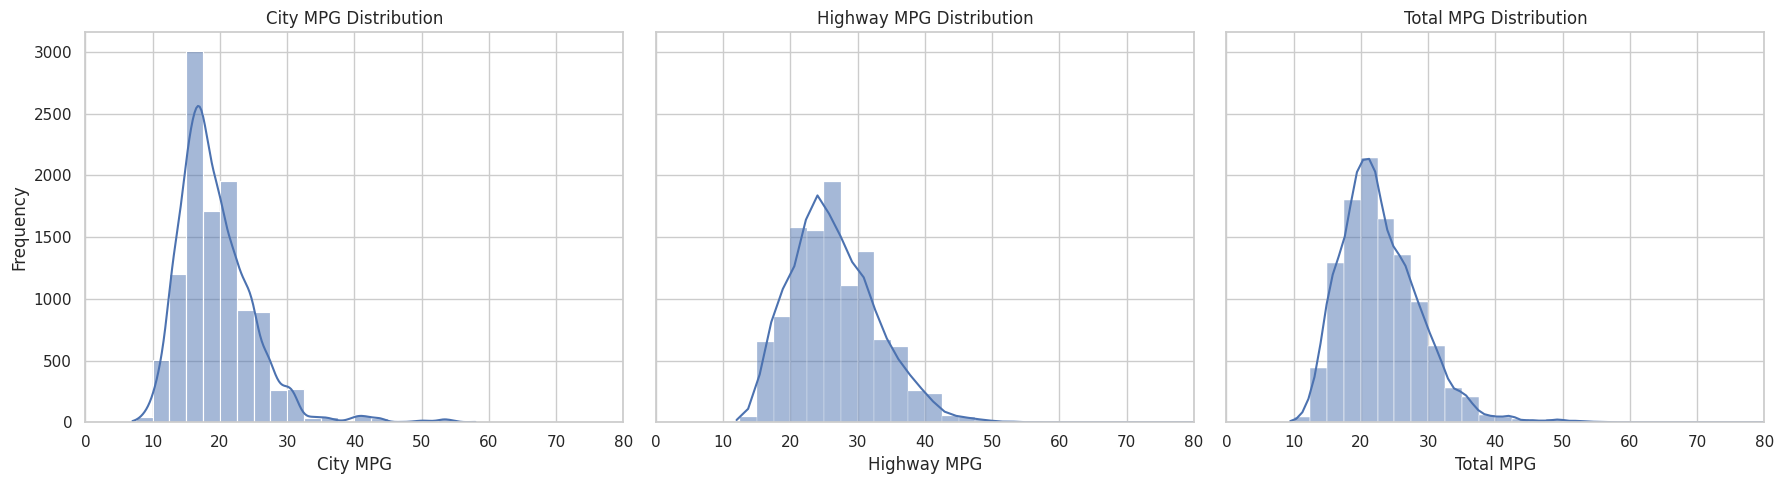

In [52]:
# Create histograms that show the distribution for city_mpg, highway_mpg and total_mpg
x_min, x_max = 0, 80

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for ax, col, title, xlabel in zip(
    axes,
    ["city_mpg", "highway_mpg", "total_mpg"],
    ["City MPG Distribution", "Highway MPG Distribution", "Total MPG Distribution"],
    ["City MPG", "Highway MPG", "Total MPG"]
):
    sns.histplot(
        df_car_analysis[col],
        binwidth=2.5,
        binrange=(x_min, x_max),
        kde=True,
        kde_kws={"cut": 0}, # KDE limited to data range to avoid extrapolation beyond observed values
        ax=ax
    )
    ax.set_xlim(x_min, x_max)
    ax.set_title(title)
    ax.set_xlabel(xlabel)

axes[0].set_ylabel("Frequency")
plt.tight_layout()
plt.show()

### **8.2 Price by Vehicle Size**
This visualization compares average vehicle prices across size segments to assess how pricing scales with vehicle class.

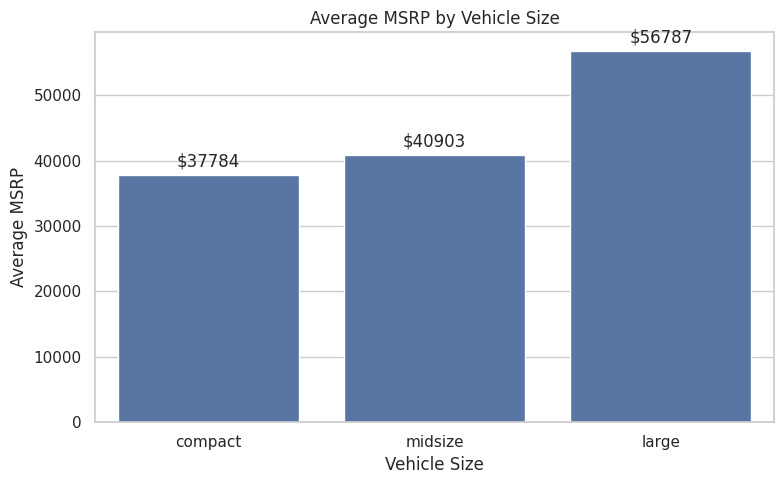

In [54]:
# Step 1: Calculate average Price per vehicle_size
avg_price_by_size = (
    df_car_analysis
    .groupby("vehicle_size", as_index=False)["msrp"]
    .mean()
)

# Step 2: Create a bar chart showing the average MSRP for each category in Vehicle Size
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=avg_price_by_size,
    x="vehicle_size",
    y="msrp",
    order=["compact", "midsize", "large"]
)

ax.set_title("Average MSRP by Vehicle Size")
ax.set_xlabel("Vehicle Size")
ax.set_ylabel("Average MSRP")

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt="$%.0f", padding=3)

plt.tight_layout()
plt.show()

### **8.3 Price vs. Engine Power**
This visualization examines the relationship between engine power and vehicle price to assess how performance scales with MSRP.

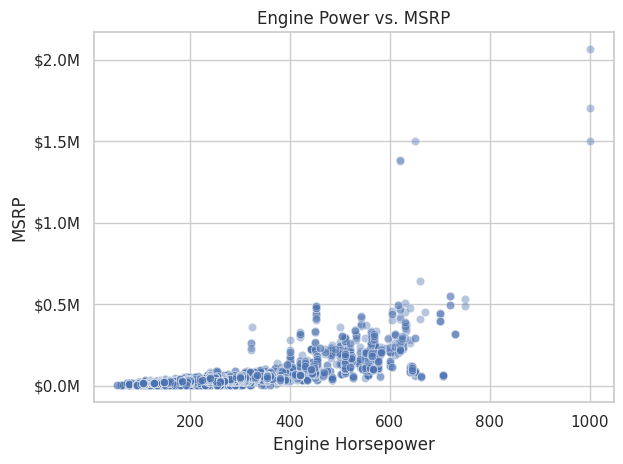

In [56]:
# Create a scatter plot to show the relationship between Engine HP and MSRP
import matplotlib.ticker as mtick

ax = sns.scatterplot(
    data=df_car_analysis,
    x="engine_hp",
    y="msrp",
    alpha=0.4
)

ax.yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, _: f"${x/1_000_000:.1f}M")
)

ax.set_title("Engine Power vs. MSRP")
ax.set_xlabel("Engine Horsepower")
ax.set_ylabel("MSRP")
plt.tight_layout()
plt.show()

### **8.4 Price Distribution by Drivetrain**
This boxplot compares the distribution of vehicle prices across drivetrain categories to assess whether MSRP differs systematically by driven wheels configuration.

Due to the heavy-tailed price distribution, the MSRP is shown both with all outliers and with outliers hidden to improve readability while preserving transparency.

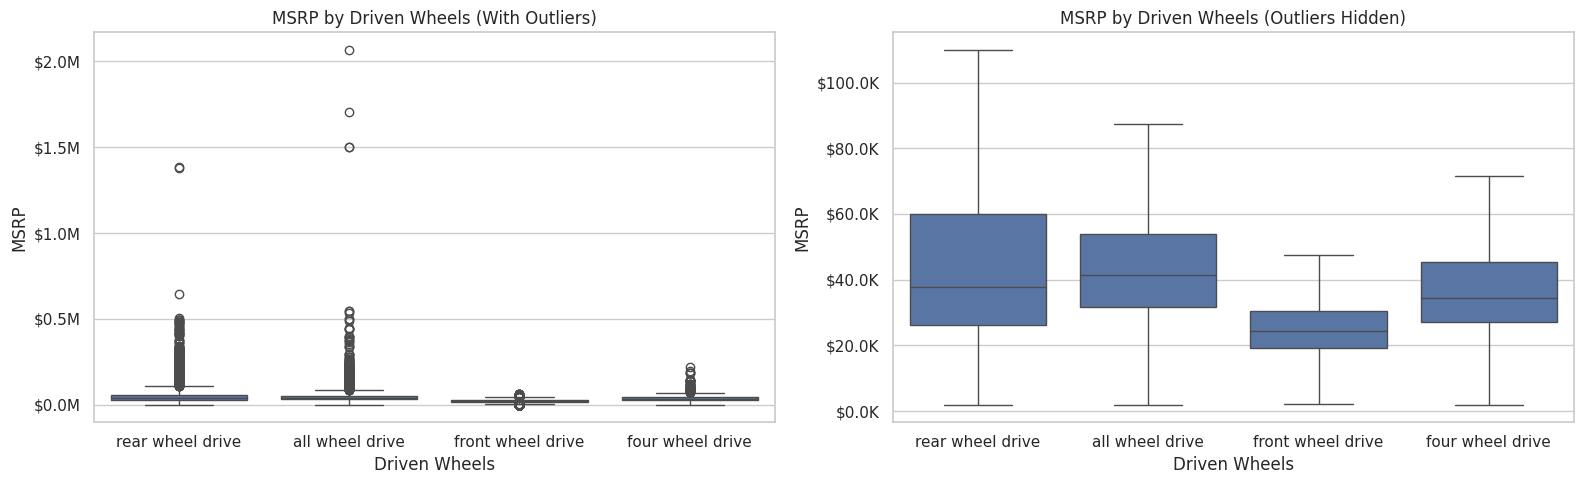

In [59]:
# Create a boxplot showing the distribution of MSRP for each category in Driven_Wheels
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=False)

# Plot 1: With outliers
sns.boxplot(
    data=df_car_analysis,
    x="driven_wheels",
    y="msrp",
    showfliers=True,
    ax=axes[0]
)
axes[0].set_title("MSRP by Driven Wheels (With Outliers)")
axes[0].set_xlabel("Driven Wheels")
axes[0].set_ylabel("MSRP")
axes[0].yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, _: f"${x/1_000_000:.1f}M")
)

# Plot 2: Without outliers
sns.boxplot(
    data=df_car_analysis,
    x="driven_wheels",
    y="msrp",
    showfliers=False,
    ax=axes[1]
)
axes[1].set_title("MSRP by Driven Wheels (Outliers Hidden)")
axes[1].set_xlabel("Driven Wheels")
axes[1].set_ylabel("MSRP")
axes[1].yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, _: f"${x/1_000:.1f}K")
)

plt.tight_layout()
plt.show()

### **8.5 Fuel efficiency Trends by Transmission Type**
This visualization compares average fuel efficiency metrics across transmission types using a connected dot plot.

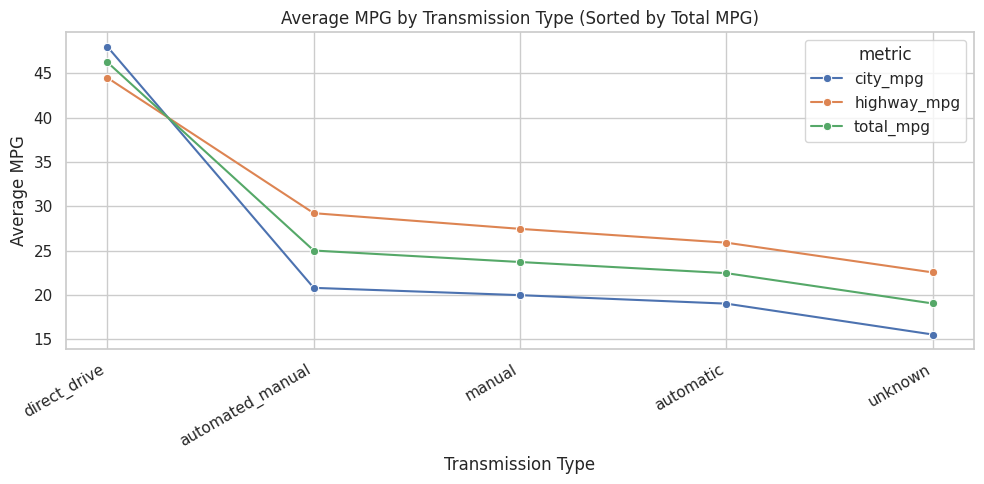

In [61]:
# Create a line plot (connected dot) showing trends in average city_mpg, highway_mpg and total_mpg for different Transmission Types

# Step 1: Calculate average mpg per Transmission Type
mpg_by_transmission = (
    df_car_analysis
    .groupby("transmission_type", as_index=False)[["city_mpg", "highway_mpg", "total_mpg"]]
    .mean()
)

# Step 2: Sort by total_mpg descending
mpg_by_transmission = mpg_by_transmission.sort_values(
    by="total_mpg",
    ascending=False
)

# Step 3: Transform to long table (unpivot)

mpg_long = mpg_by_transmission.melt(
    id_vars="transmission_type",
    value_vars=["city_mpg", "highway_mpg", "total_mpg"],
    var_name="metric",
    value_name="avg_mpg"
)

# Step 4: Create the line plot (connected dot plot)
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=mpg_long,
    x="transmission_type",
    y="avg_mpg",
    hue="metric",
    marker="o"
)

plt.title("Average MPG by Transmission Type (Sorted by Total MPG)")
plt.xlabel("Transmission Type")
plt.ylabel("Average MPG")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


## **9. Correlation Analysis**
This section examines pairwise relationships between key numerical variables using correlation coefficients to quantify the strength and direction of their linear associations.

This correlation matrix provides a descriptive overview of linear relationships between key vehicle attributes and serves as the basis for further analysis.

In addition to the descriptive correlation matrix, pairwise correlations with p-values and confidence intervals are reported as a supplementary analysis. Given the large sample size, statistical significance is expected for most relationships and is therefore interpreted with caution.

In [72]:
# Investigate the correlation between the mentioned variables
corr_vars = [
    "engine_hp",
    "engine_cylinders",
    "msrp",
    "popularity",
    "city_mpg",
    "highway_mpg"
]

corr_matrix = df_car_analysis[corr_vars].corr(method="pearson")
corr_matrix.round(2)


,engine_hp,engine_cylinders,msrp,popularity,city_mpg,highway_mpg
engine_hp,1.00,0.80,0.65,0.03,-0.57,-0.47
engine_cylinders,0.80,1.00,0.56,0.04,-0.69,-0.63
msrp,0.65,0.56,1.00,-0.06,-0.29,-0.24
popularity,0.03,0.04,-0.06,1.00,-0.02,-0.04
city_mpg,-0.57,-0.69,-0.29,-0.02,1.00,0.83
highway_mpg,-0.47,-0.63,-0.24,-0.04,0.83,1.00


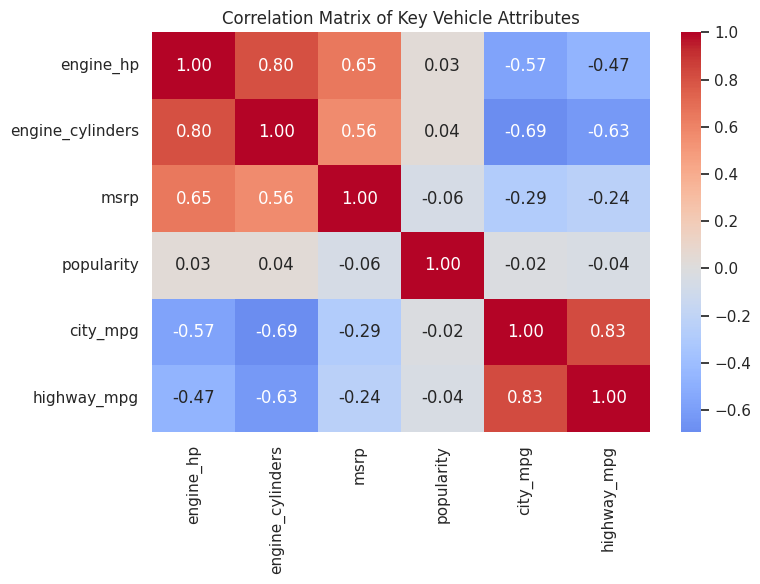

In [73]:
# Create a heatmap to visualize the correlations
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0
)
plt.title("Correlation Matrix of Key Vehicle Attributes")
plt.tight_layout()
plt.show()


As Pearson correlation captures linear relationships only, weak or moderate coefficients do not necessarily imply the absence of a relationship, particularly when visual analysis suggests non-linear patterns.


In [74]:
# Inspect statistical significance and confidence intervals
import pingouin as pg

pg.pairwise_corr(
    data=df_car_analysis,
    columns=corr_vars,
    method="pearson"
)


,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,engine_hp,engine_cylinders,pearson,two-sided,10977,0.803248,"[0.8, 0.81]",0.000000e+00,inf,1.000000
1,engine_hp,msrp,pearson,two-sided,10977,0.654328,"[0.64, 0.66]",0.000000e+00,inf,1.000000
2,engine_hp,popularity,pearson,two-sided,10977,0.030901,"[0.01, 0.05]",1.203849e-03,2.26,0.899432
3,engine_hp,city_mpg,pearson,two-sided,10977,-0.567782,"[-0.58, -0.55]",0.000000e+00,inf,1.000000
4,engine_hp,highway_mpg,pearson,two-sided,10977,-0.470804,"[-0.49, -0.46]",0.000000e+00,inf,1.000000
5,engine_cylinders,msrp,pearson,two-sided,10977,0.564305,"[0.55, 0.58]",0.000000e+00,inf,1.000000
6,engine_cylinders,popularity,pearson,two-sided,10977,0.039832,"[0.02, 0.06]",2.987451e-05,72.653,0.986623
7,engine_cylinders,city_mpg,pearson,two-sided,10977,-0.691495,"[-0.7, -0.68]",0.000000e+00,inf,1.000000
8,engine_cylinders,highway_mpg,pearson,two-sided,10977,-0.630284,"[-0.64, -0.62]",0.000000e+00,inf,1.000000
9,msrp,popularity,pearson,two-sided,10977,-0.057383,"[-0.08, -0.04]",1.783860e-09,8.644e+05,0.999975


The heatmap visualizes Pearson correlation coefficients only and therefore remains identical. The Pingouin results extend this analysis by adding statistical significance and confidence intervals while leaving the correlation values unchanged.

## **10. Regression Analysis**
Overall, simple linear models confirm that vehicle pricing is primarily associated with engine performance, while engine configuration adds only limited explanatory power beyond horsepower.

### **10.1 Regression: MSRP ~ Engine HP**
The linear regression confirms a strong positive association between engine horsepower and vehicle price. Engine power alone explains approximately 43 % of the variation in MSRP. On average, each additional horsepower is associated with an increase of about 370 USD in list price. While the relationship is statistically significant, substantial residual variation and outliers indicate that vehicle pricing is influenced by additional factors beyond engine power.

In [75]:
# Calculate Regression for strongly correlated variables engine_hp and msrp
import statsmodels.api as sm

# Define variables
X = df_car_analysis["engine_hp"]
y = df_car_analysis["msrp"]

# Add intercept
X = sm.add_constant(X)

# Fit model
model_hp = sm.OLS(y, X).fit()

# Show summary
model_hp.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   msrp   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     8217.
Date:                Fri, 06 Feb 2026   Prob (F-statistic):               0.00
Time:                        14:26:16   Log-Likelihood:            -1.3356e+05
No. Observations:               10977   AIC:                         2.671e+05
Df Residuals:                   10975   BIC:                         2.671e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.175e+04   1140.349    -45.381      0.000    -5.4e+04   -4.95e+04
engine_hp    370.4390      4.087     90.647      0.000     362.428     378.449
==============================================================================
Omnibus:                    21427.424   Durbin-Watson:                   0.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         86893819.657
Skew:                          15.254   Prob(JB):                         0.00
Kurtosis:                     437.802   Cond. No.                         716.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **10.2 Regression: MSRP ~ Engine HP + Engine Cylinders**
Extending the regression model by engine cylinder count slightly increases the explained variance in MSRP compared to the single-variable model. Engine horsepower remains the dominant price driver, while engine cylinders add a statistically significant but comparatively smaller contribution after controlling for power. The modest improvement in model fit indicates that pricing is primarily associated with performance rather than engine configuration alone.

In [90]:
# Add engine_cylinders to the Regression calculation

X = df_car_analysis[["engine_hp", "engine_cylinders"]].astype(float) # Cast to float to ensure compatibility with statsmodels (no nullable dtypes)
y = df_car_analysis["msrp"].astype(float)

X = sm.add_constant(X)
model_hp_cyl = sm.OLS(y, X).fit()
model_hp_cyl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   msrp   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     4180.
Date:                Fri, 06 Feb 2026   Prob (F-statistic):               0.00
Time:                        17:07:52   Log-Likelihood:            -1.3352e+05
No. Observations:               10977   AIC:                         2.670e+05
Df Residuals:                   10974   BIC:                         2.671e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -6.071e+04   1507.731    -40.264      0.000   -6.37e+04   -5.78e+04
engine_hp          320.8130      6.836     46.932      0.000     307.414     334.212
engine_cylinders  3826.6273    423.391      9.038      0.000    2996.704    4656.550
==============================================================================
Omnibus:                    21399.534   Durbin-Watson:                   0.720
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         87377889.914
Skew:                          15.203   Prob(JB):                         0.00
Kurtosis:                     439.025   Cond. No.                         967.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## **11. ANOVA**
As popularity showed little linear correlation with technical vehicle attributes, an additional analysis examines whether popularity differs across categorical characteristics such as vehicle size.

While post-hoc tests indicate statistically significant differences in mean popularity between large vehicles and both compact and midsize categories, the boxplots reveal substantial overlap and similar medians across groups. This suggests that the observed differences are statistically detectable but modest in practical magnitude, with vehicle size explaining only a limited portion of popularity variation.

In [91]:
# Calculate ANOVA: Tests for overall differences in mean popularity across vehicle sizes.
from scipy.stats import f_oneway

groups = [
    df_car_analysis.loc[df_car_analysis["vehicle_size"] == size, "popularity"]
    for size in ["compact", "midsize", "large"]
]

f_stat, p_value = f_oneway(*groups)
f_stat, p_value

(np.float64(93.98351239923231), np.float64(3.3814185323887347e-41))

In [92]:
# Calculate Post-hoc (Tukey HSD): Identifies pairwise differences in mean popularity between vehicle size groups.
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(
    endog=df_car_analysis["popularity"],
    groups=df_car_analysis["vehicle_size"],
    alpha=0.05
)

print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1  group2  meandiff p-adj    lower     upper   reject
-----------------------------------------------------------
compact   large   433.154    0.0  348.9581  517.3498   True
compact midsize  -20.6588 0.7884  -94.3758   53.0581  False
  large midsize -453.8128    0.0 -538.3542 -369.2714   True
-----------------------------------------------------------


<Axes: xlabel='vehicle_size', ylabel='popularity'>

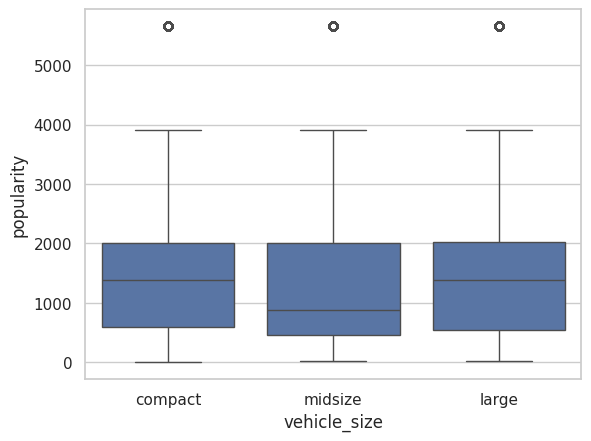

In [94]:
# Create Boxplots: Visual comparison of popularity distributions across vehicle sizes.
sns.boxplot(
    data=df_car_analysis,
    x="vehicle_size",
    y="popularity",
    order=["compact", "midsize", "large"]
)

## **12. Key Insights and Conclusion**

### **12.1 Limitations**
This analysis is descriptive in nature and relies on simple linear models with a limited set of technical features. Extreme price outliers and omitted non-technical factors constrain the explanatory power and limit causal interpretation of the results.

### **12.2 Summary**
This analysis examined pricing, fuel efficiency, and popularity patterns in the passenger car market, with a focus on combustion-engine vehicles produced from 1995 onward. Exploratory data analysis shows clear and expected relationships between technical attributes: engine horsepower is strongly associated with vehicle price, while fuel efficiency declines as engine power and cylinder count increase. Regression results confirm that engine horsepower is the strongest technical predictor of MSRP, explaining a substantial share of price variation, whereas engine cylinder count adds only limited explanatory power once performance is taken into account. These findings indicate that vehicle pricing is more closely tied to performance outcomes than to underlying engine configuration alone.


In contrast, vehicle popularity exhibits little linear association with technical performance or efficiency measures. While ANOVA results indicate statistically significant differences across vehicle size categories, substantial overlap in distributions and similar medians suggest that these differences are modest in practical terms. Overall, the findings indicate that popularity is likely driven by non-technical factors such as brand positioning, design, and market dynamics, which are not explicitly modeled in this analysis.